Most code is borrowed from Kaggle Kernel below:

In [54]:
kernel_url = 'https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367'

In [55]:
'''
FUTURE NOTE:

Kernel has really good XGBoost example, can examine in the future

'''

'\nFUTURE NOTE:\n\nKernel has really good XGBoost example, can examine in the future\n\n'

In [32]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
txorig = pd.read_csv('train.csv')

txorig.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [14]:
# useful way to check if all column cells are unique
if txorig.id.nunique() == txorig.id.shape[0]:
    print('All ids are unique')

All ids are unique


In [21]:
# useful way to check for missing data
if txorig.count().min() == txorig.shape[0]:
    print('No missing values in dataset')

No missing values in dataset


In [28]:
# useful way to return unique values for print
str(set(txorig.store_and_fwd_flag.unique()))

"{'N', 'Y'}"

In [29]:
str(txorig.store_and_fwd_flag.unique())

"['N' 'Y']"

In [35]:
# useful way to convert / wrangle datetime without parser

txorig['pickup_datetime'] = pd.to_datetime(txorig['pickup_datetime'])

txorig['pickup_date'] = txorig['pickup_datetime'].dt.date

txorig.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [41]:
txorig.groupby('pickup_date').count()['id'][:10]

pickup_date
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
2016-01-06    7365
2016-01-07    7649
2016-01-08    8229
2016-01-09    8578
2016-01-10    7454
Name: id, dtype: int64

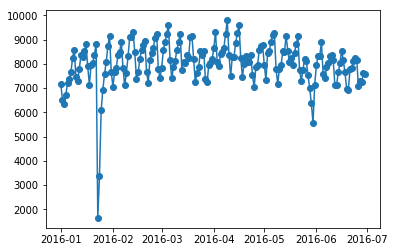

In [44]:
# useful way to plot groups by date
plt.plot(txorig.groupby('pickup_date').count()[['id']], 'o-')

In [45]:
# useful way to plot lat-long

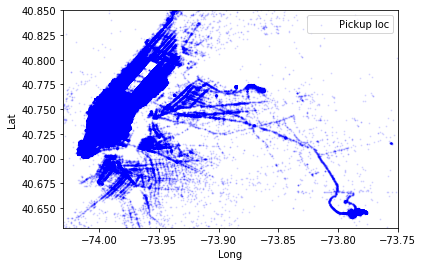

In [53]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.scatter(txorig['pickup_longitude'].values[:],
            txorig['pickup_latitude'].values[:],
            color='blue', s=1, label='Pickup loc', alpha=0.1
           )

plt.legend(loc=0)
plt.ylabel('Lat')
plt.xlabel('Long')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [56]:
# should revisit to try out xgboost